## Title of the project : Stock News Headlines -  Sentiment Analysis

## 1. Import the libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Load the Dataset

In [2]:
df = pd.read_csv(r'D:\Sentiment Analysis - Dow Jones (DJIA) Stock using News Headlines\Stock_Headlines.csv', encoding='ISO-8859-1')

In [3]:
df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [4]:
df.shape

(4101, 27)

In [5]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


### Note: Here 'Label' is a binary attribute which consists 0 - Stock price goes down or stays the same, 1 - Stock price goes up.

## 3. Visualizing the count of 'Label' column from the dataset

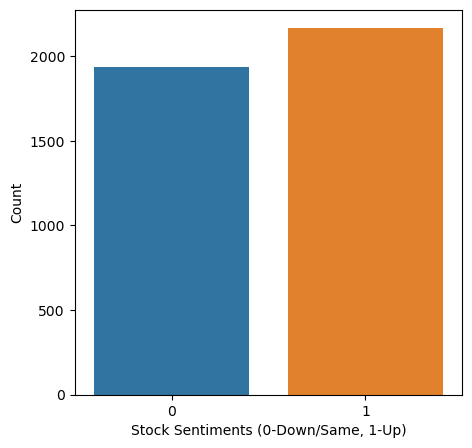

In [6]:
plt.figure(figsize=(5,5))
sns.countplot(x='Label', data=df)
plt.xlabel('Stock Sentiments (0-Down/Same, 1-Up)')
plt.ylabel('Count')

plt.show()

## 4. Data Cleaning and Preprocessing

In [7]:
print(df.shape)

(4101, 27)


In [8]:
df.isnull().any()

Date     False
Label    False
Top1     False
Top2     False
Top3     False
Top4     False
Top5     False
Top6     False
Top7     False
Top8     False
Top9     False
Top10    False
Top11    False
Top12    False
Top13    False
Top14    False
Top15    False
Top16    False
Top17    False
Top18    False
Top19    False
Top20    False
Top21    False
Top22    False
Top23     True
Top24     True
Top25     True
dtype: bool

### 1] Dropping NaN values

In [9]:
df.dropna(inplace=True)
print(df.shape)

(4098, 27)


In [10]:
df_copy = df.copy()

In [11]:
df_copy.reset_index(inplace=True)

## 5. Splitting the Dataset into Train an Test set

In [12]:
train = df_copy[df_copy['Date'] < '20150101']
test = df_copy[df_copy['Date'] > '20141231']
print('Train size: {}, Test size: {}'.format(train.shape, test.shape))

Train size: (3972, 28), Test size: (378, 28)


In [13]:
train.columns

Index(['index', 'Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5',
       'Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13',
       'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21',
       'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

### 1] Splitting the dataset

In [14]:
y_train = train['Label']
train = train.iloc[:, 3:28]
y_test = test['Label']
test = test.iloc[:, 3:28]

## 6. Importing essential libraries for performing Natural Language Processing on given dataset

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

### 7.1] Removing punctuation and special character from the text

In [16]:
train.replace(to_replace='[^a-zA-Z]', value=' ', inplace=True)
test.replace(to_replace='[^a-zA-Z]', value=' ', inplace=True)

### 7.2] Renaming columns

In [17]:
new_columns = [str(i) for i in range(0,25)]
train.columns = new_columns
test.columns = new_columns

### 7.3] Converting the entire text to lower case

In [18]:
for i in new_columns:
    train[i] = train[i].str.lower()
    test[i] = test[i].str.lower()

### 7.4] Joining all the columns

In [19]:
train_headlines = []
test_headlines = []

for row in range(0, train.shape[0]):
    train_headlines.append(' '.join(str(x) for x in train.iloc[row, 0:25]))

for row in range(0, test.shape[0]):
    test_headlines.append(' '.join(str(x) for x in test.iloc[row, 0:25]))

In [20]:
train_headlines[0]

"a 'hindrance to operations': extracts from the leaked reports scorecard hughes' instant hit buoys blues jack gets his skates on at ice-cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton's party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar's debut double southgate strikes, leeds pay the penalty hammers hand robson a youthful lesson saints party like it's 1999 wear wolves have turned into lambs stump mike catches testy gough's taunt langer escapes to hit 167 flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl's successor drawn into scandal the difference between men and women sara denver, nurse turned solicitor diana's landmine crusade put tories in a panic yeltsin's resignation caught opposition flat-footed russian roulette sold out recovering a title"

In [21]:
test_headlines[0]

'most cases of cancer are the result of sheer bad luck rather than unhealthy lifestyles, diet or even inherited genes, new research suggests. random mutations that occur in dna when cells divide are responsible for two thirds of adult cancers across a wide range of tissues. iran dismissed united states efforts to fight islamic state as a ploy to advance u.s. policies in the region: "the reality is that the united states is not acting to eliminate daesh. they are not even interested in weakening daesh, they are only interested in managing it" poll: one in 8 germans would join anti-muslim marches uk royal family\'s prince andrew named in us lawsuit over underage sex allegations some 40 asylum-seekers refused to leave the bus when they arrived at their destination in rural northern sweden, demanding that they be taken back to malm or "some big city". pakistani boat blows self up after india navy chase. all four people on board the vessel from near the pakistani port city of karachi are be

## 8. Creating corpus of train dataset

In [22]:
pc = PorterStemmer()
train_corpus = []

for i in range(0, len(train_headlines)):
    
    # Tokenizing the news-title by words
    words = train_headlines[i].split()
    
    # Removing the stopwords
    words = [word for word in words if word not in set(stopwords.words('english'))]
    
    # Stemming the words
    words = [pc.stem(word) for word in words]
    
    # Joining the stemmed words
    headline = ' '.join(words)
    
    # Building a corpus of news-title
    train_corpus.append(headline)

## 9. Creating corpus of test dataset

In [23]:
test_corpus = []

for i in range(0, len(test_headlines)):
    
    # Tokenizing the news-title by words
    words = test_headlines[i].split()
    
    # Removing the stopwords
    words = [word for word in words if word not in set(stopwords.words('english'))]
    
    # Stemming te words
    words = [pc.stem(word) for word in words]
    
    # Joining the stemmed words
    headline = ' '.join(words)
    
    #Building a corpus of news-title
    test_corpus.append(headline)

In [24]:
train_corpus[0:10]

["'hindranc operations': extract leak report scorecard hughes' instant hit buoy blue jack get skate ice-cold alex chao maracana build unit deplet leicest prevail elliott spoil everton' parti hungri spur sens rich pick gunner wide easi target derbi rais glass strupar' debut doubl southgat strikes, leed pay penalti hammer hand robson youth lesson saint parti like 1999 wear wolv turn lamb stump mike catch testi gough' taunt langer escap hit 167 flintoff injuri pile woe england hunter threaten jospin new battl somm kohl' successor drawn scandal differ men women sara denver, nurs turn solicitor diana' landmin crusad put tori panic yeltsin' resign caught opposit flat-foot russian roulett sold recov titl",
 "scorecard best lake scene leader: german sleaz inquiri cheerio, boyo main recommend cubi kill fees? cubi kill fees? cubi kill fees? hopkin 'furious' foster' lack hannib appetit cubi kill fees? tale two tail say like like say elbows, eye nippl task forc assess risk asteroid collis found la

In [25]:
test_corpus[0:10]

['case cancer result sheer bad luck rather unhealthi lifestyles, diet even inherit genes, new research suggests. random mutat occur dna cell divid respons two third adult cancer across wide rang tissues. iran dismiss unit state effort fight islam state ploy advanc u.s. polici region: "the realiti unit state act elimin daesh. even interest weaken daesh, interest manag it" poll: one 8 german would join anti-muslim march uk royal family\' princ andrew name us lawsuit underag sex alleg 40 asylum-seek refus leav bu arriv destin rural northern sweden, demand taken back malm "some big city". pakistani boat blow self india navi chase. four peopl board vessel near pakistani port citi karachi believ kill dramat episod arabian sea new year\' eve, accord india\' defenc ministry. sweden hit third mosqu arson attack week 940 car set alight french new year salari top ceo rose twice fast averag canadian sinc recession: studi norway violat equal-pay law, judg says: judg find consul employe unjustli pai

In [26]:
down_words = []

for i in list(y_train[y_train == 0].index):
    down_words.append(train_corpus[i])
    
up_words = []

for i in list(y_train[y_train == 1].index):
    up_words.append(train_corpus[i])

In [27]:
down_words

["'hindranc operations': extract leak report scorecard hughes' instant hit buoy blue jack get skate ice-cold alex chao maracana build unit deplet leicest prevail elliott spoil everton' parti hungri spur sens rich pick gunner wide easi target derbi rais glass strupar' debut doubl southgat strikes, leed pay penalti hammer hand robson youth lesson saint parti like 1999 wear wolv turn lamb stump mike catch testi gough' taunt langer escap hit 167 flintoff injuri pile woe england hunter threaten jospin new battl somm kohl' successor drawn scandal differ men women sara denver, nurs turn solicitor diana' landmin crusad put tori panic yeltsin' resign caught opposit flat-foot russian roulett sold recov titl",
 "scorecard best lake scene leader: german sleaz inquiri cheerio, boyo main recommend cubi kill fees? cubi kill fees? cubi kill fees? hopkin 'furious' foster' lack hannib appetit cubi kill fees? tale two tail say like like say elbows, eye nippl task forc assess risk asteroid collis found la

In [28]:
down_words[1]

"scorecard best lake scene leader: german sleaz inquiri cheerio, boyo main recommend cubi kill fees? cubi kill fees? cubi kill fees? hopkin 'furious' foster' lack hannib appetit cubi kill fees? tale two tail say like like say elbows, eye nippl task forc assess risk asteroid collis found last critic list time live dear doctor irish court halt ira man' extradit northern ireland burundi peac initi fade rebel reject mandela mediat pe point way forward ecb campaign keep pressur nazi war crime suspect jane ratcliff yet thing know without movi millennium bug fail bite"

## 10. Creating wordcloud for down_words

In [29]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


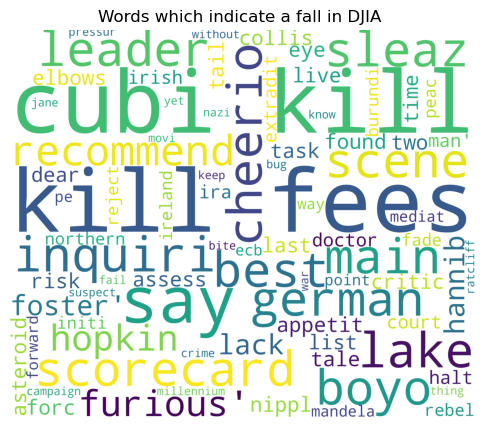

In [30]:
from wordcloud import WordCloud

wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(down_words[1])

plt.figure(figsize=(6,6))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate a fall in DJIA ")
plt.show()

## 11.Creating wordcloud for up_words

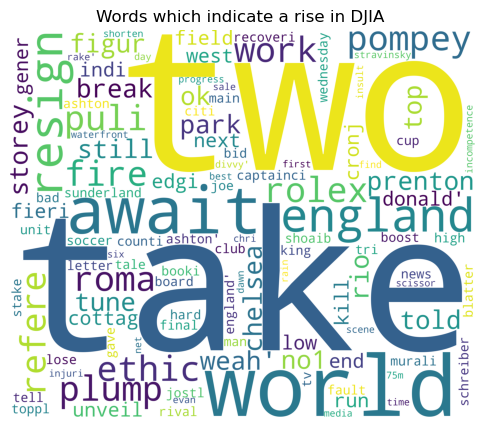

In [31]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(up_words[5])

plt.figure(figsize=(6,6))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate a rise in DJIA ")
plt.show()

## 12. Creating the Bag of Words model

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(2,2))

X_train = cv.fit_transform(train_corpus).toarray()

In [33]:
X_test = cv.transform(test_corpus).toarray()

## 13. Model Building

### 1] Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred_lr = lr.predict(X_test)

### Accuracy, Precision and Recall

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, y_pred_lr)
score2 = precision_score(y_test, y_pred_lr)
score3 = recall_score(y_test, y_pred_lr)

In [37]:
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 84.66%
Precision score is: 0.85
Recall score is: 0.85


### Making the Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, y_pred_lr)

In [39]:
lr_cm

array([[157,  29],
       [ 29, 163]], dtype=int64)

### Visualize the confusion matrix

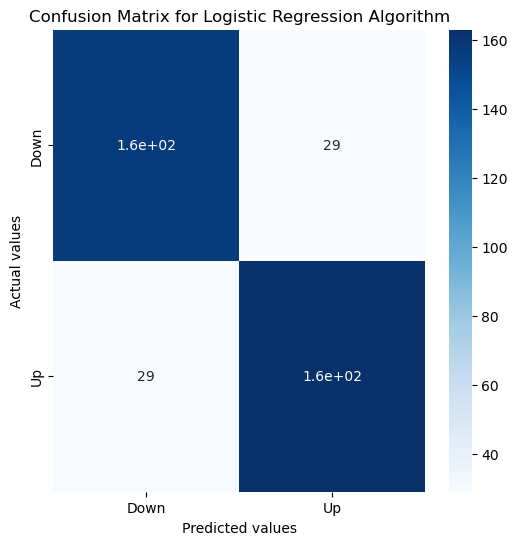

In [40]:
plt.figure(figsize=(6,6))
sns.heatmap(data=lr_cm, annot=True, cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

### 2] SVM

In [41]:
from sklearn.svm import SVC
svm = SVC()

svm.fit(X_train, y_train)

SVC()

In [42]:
y_pred_svm = svm.predict(X_test)

### Accuracy, Precision and Recall

In [43]:
score1 = accuracy_score(y_test, y_pred_svm)
score2 = precision_score(y_test, y_pred_svm)
score3 = recall_score(y_test, y_pred_svm)

In [44]:
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 84.66%
Precision score is: 0.78
Recall score is: 0.97


### Making the Confusion Matrix

In [45]:
svm_cm = confusion_matrix(y_test, y_pred_svm)

In [46]:
svm_cm

array([[133,  53],
       [  5, 187]], dtype=int64)

### Visualize the confusion matrix

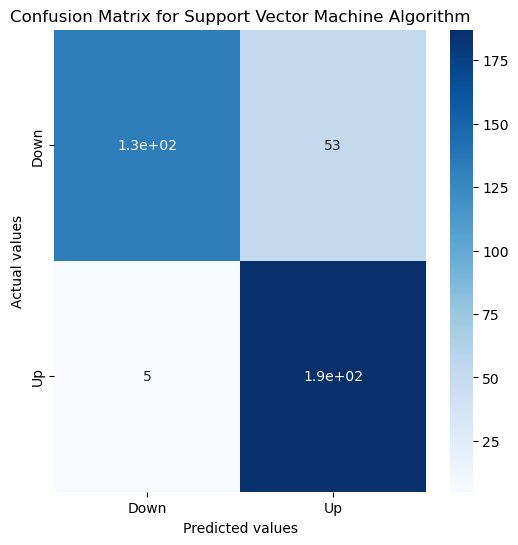

In [47]:
plt.figure(figsize=(6,6))
sns.heatmap(data=svm_cm, annot=True, cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Support Vector Machine Algorithm')
plt.show()

### 3] Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
y_pred_dt = dt.predict(X_test)

### Accuracy, Precision and Recall

In [50]:
score1 = accuracy_score(y_test, y_pred_dt)
score2 = precision_score(y_test, y_pred_dt)
score3 = recall_score(y_test, y_pred_dt)

In [51]:
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 85.45%
Precision score is: 0.85
Recall score is: 0.86


### Making the Confusion Matrix

In [52]:
dt_cm = confusion_matrix(y_test, y_pred_dt)

In [53]:
dt_cm

array([[157,  29],
       [ 26, 166]], dtype=int64)

### Visualize the confusion matrix

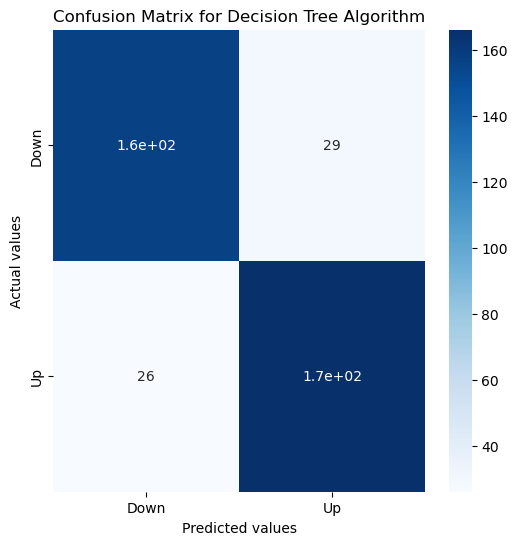

In [54]:
plt.figure(figsize=(6,6))
sns.heatmap(data=dt_cm, annot=True, cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Decision Tree Algorithm')
plt.show()

### 4] Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')

rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [56]:
y_pred_rf = rf.predict(X_test)

### Accuracy, Precision and Recall

In [57]:
score1 = accuracy_score(y_test, y_pred_rf)
score2 = precision_score(y_test, y_pred_rf)
score3 = recall_score(y_test, y_pred_rf)

In [58]:
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 84.66%
Precision score is: 0.84
Recall score is: 0.86


### Making the Confusion Matrix

In [59]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [60]:
cm_rf

array([[154,  32],
       [ 26, 166]], dtype=int64)

### Visualize the confusion matrix

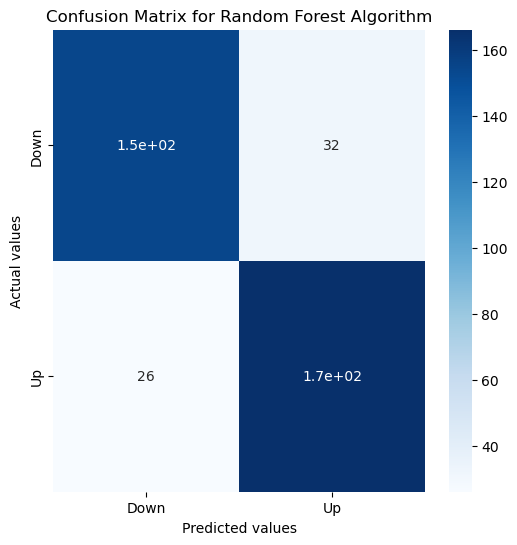

In [61]:
plt.figure(figsize=(6,6))
sns.heatmap(data=cm_rf, annot=True, cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Random Forest Algorithm')
plt.show()

### 5] Gaussian Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [63]:
y_pred_gnb = gnb.predict(X_test)

### Accuracy, Precision and Recall

In [64]:
score1 = accuracy_score(y_test, y_pred_gnb)
score2 = precision_score(y_test, y_pred_gnb)
score3 = recall_score(y_test, y_pred_gnb)

In [65]:
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 83.33%
Precision score is: 0.86
Recall score is: 0.8


### Making the Confusion Matrix

In [66]:
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

In [67]:
cm_gnb

array([[161,  25],
       [ 38, 154]], dtype=int64)

### Visualize the confusion matrix

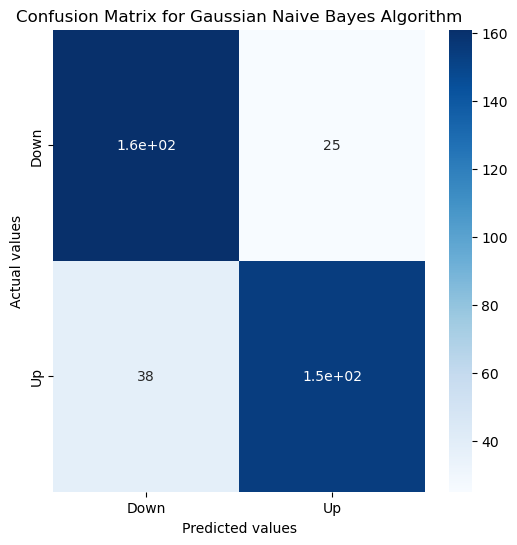

In [68]:
plt.figure(figsize=(6,6))
sns.heatmap(data=cm_gnb, annot=True, cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Gaussian Naive Bayes Algorithm')
plt.show()

### 6] Bernoulli Naive Bayes

In [69]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

bnb.fit(X_train, y_train)

BernoulliNB()

In [70]:
y_pred_bnb = bnb.predict(X_test)

### Accuracy, Precision and Recall

In [71]:
score1 = accuracy_score(y_test, y_pred_bnb)
score2 = precision_score(y_test, y_pred_bnb)
score3 = recall_score(y_test, y_pred_bnb)

In [72]:
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 84.66%
Precision score is: 0.86
Recall score is: 0.84


### Making the Confusion Matrix

In [73]:
cm_bnb = confusion_matrix(y_test, y_pred_bnb)

In [74]:
cm_bnb

array([[159,  27],
       [ 31, 161]], dtype=int64)

### Visualize the confusion matrix

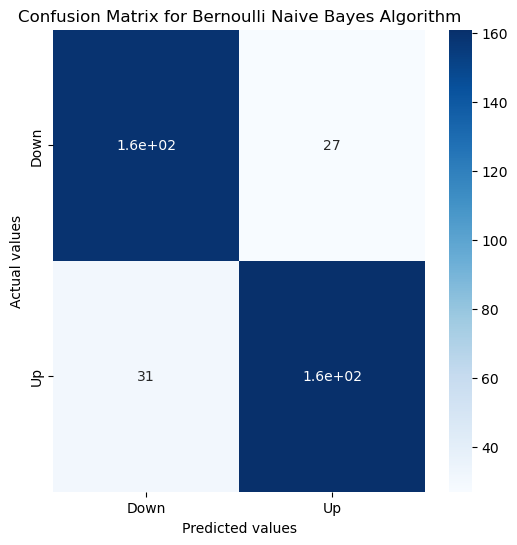

In [75]:
plt.figure(figsize=(6,6))
sns.heatmap(data=cm_bnb, annot=True, cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Bernoulli Naive Bayes Algorithm')
plt.show()

### 7] Multionomial Naive Bayes

In [76]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

mnb.fit(X_train, y_train)

MultinomialNB()

In [77]:
y_pred_mnb = mnb.predict(X_test)

### Accuracy, Precision and Recall

In [78]:
score1 = accuracy_score(y_test, y_pred_mnb)
score2 = precision_score(y_test, y_pred_mnb)
score3 = recall_score(y_test, y_pred_mnb)

In [79]:
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 85.98%
Precision score is: 0.87
Recall score is: 0.85


### Making the Confusion Matrix

In [80]:
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

In [81]:
cm_mnb

array([[161,  25],
       [ 28, 164]], dtype=int64)

### Visualize the confusion matrix

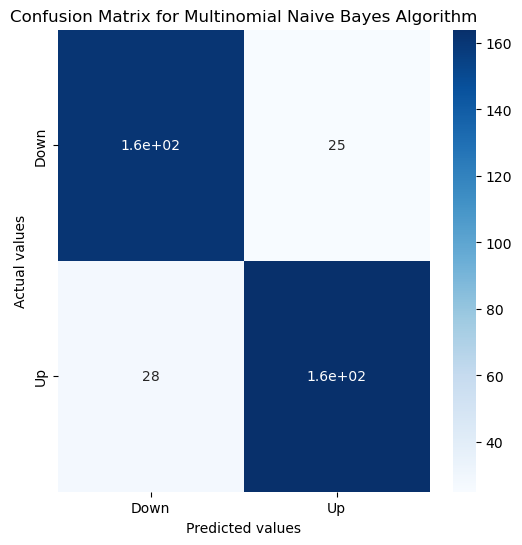

In [82]:
plt.figure(figsize=(6,6))
sns.heatmap(data=cm_mnb, annot=True, cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [85]:
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'Bernoulli Naive Bayes', 'Multinomial Naive Bayes']
accuracies = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gnb), accuracy_score(y_test, y_pred_bnb), accuracy_score(y_test, y_pred_mnb)]

In [87]:
data = {'Model Name' :model_names, 'Accuracy Score': accuracies}

df2 = pd.DataFrame(data)
df2

,Model Name,Accuracy Score
0,Logistic Regression,0.846561
1,SVM,0.846561
2,Decision Tree,0.854497
3,Random Forest,0.846561
4,Gaussian Naive Bayes,0.833333
5,Bernoulli Naive Bayes,0.846561
6,Multinomial Naive Bayes,0.859788


In [88]:
df2.sort_values('Accuracy Score', ascending=False).style.background_gradient(cmap='Greens', subset=['Accuracy Score'])

,Model Name,Accuracy Score
6,Multinomial Naive Bayes,0.859788
2,Decision Tree,0.854497
0,Logistic Regression,0.846561
1,SVM,0.846561
3,Random Forest,0.846561
5,Bernoulli Naive Bayes,0.846561
4,Gaussian Naive Bayes,0.833333


## 14. Predictions

In [90]:
import re

In [91]:
def stock_prediction(sample_news):
    sample_news = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_news)
    sample_news = sample_news.lower()
    
    sample_news_words = sample_news.split()
    sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
    
    ps = PorterStemmer()
    final_news = [ps.stem(word) for word in sample_news_words]
    final_news = ' '.join(final_news)
    
    temp = cv.transform([final_news]).toarray()
    return dt.predict(temp)

In [92]:
# For generating random integer
from random import randint

In [93]:
sample_test = df_copy[df_copy['Date'] > '20141231']

In [94]:
sample_test.reset_index(inplace=True)
sample_test = sample_test['Top1']

### #1] Predicting values 

In [95]:
row = randint(0, sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Russian Official Severely Beaten After Reporting Electoral Fraud
Prediction: The stock price will remain the same or will go down.


### #2] Predicting values 

In [98]:
row = randint(0, sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Just minutes ago, a North Korean soldier walked across the border within the DMZ to defect to South Korea
Prediction: The stock price will go up!


### #3] Predicting values 

In [99]:
row = randint(0, sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Newly-surfaced video footage corroborates widespread assertions that the Turkish government's intelligence agency has been ensuring ISIL terrorists safe passage into Syria
Prediction: The stock price will go up!


## 15. Creating a Pickle File

In [100]:
import pickle

In [102]:
filename = 'stock-sentiment-dt-model.pkl'

pickle.dump(dt, open(filename, 'wb'))
pickle.dump(cv, open('cv-transform.pkl', 'wb'))